# Products and Coproducts

if we want to single out a particular object in a category
we can only do this by describing its pattern of relationships
with other objects (and itself)

these relationships are defined by morphisms

_P/51 universal construction_

**there is a common construction in cats called the universal 
construction** for defining objects in terms of their relationships.

**one way of doing this is to pick a pattern, a particular
shape constructed from objects and morphisms, and look for
all its occurrences in the category.**

if it's common enough pattern,and the category is large,
chances are you will have lots and lots of hits

**the trick is to establish some kind of ranking among
those hits, and pick what could be considered the best fit**

P/58 further states that:

**uniqueness up to unique isomorphism** is the important property
of all universal constructions

Note: 

I had some problems understanding "unique up to isomorphism" and found this article:

<http://statusfailed.com/blog/2019/04/25/what-does-unique-up-to-isomorphism-really-mean.html>

> So to wrap it up with an example, when we say “terminal objects are unique up to isomorphism”, what we mean is:

    There might be multiple terminal objects, but…
    … if there are, they have an isomorphism, and that means …
    … all those terminal objects have the exact same relationship to all other objects, and so …
    … they are interchangeable, or in a sense “indistinguishable”

$\mathscr{C}$

P/57 clarifies this notion: **when I said that
the initial/terminal object was unique up to isomorphism,
I meant that any two initial/terminal objects are 
isomorphic**

_P/52 initial object and terminal object_

**(motivation for finding the initial object)
with a lot (of shapes of object constructions) to 
choose from, we need to establish
some kind of ranking and try to find the object
that tops this hierarchy**

**the initial object is the object that has one and only one
morphism going to any object in the category**

the **terminal object** is the object with one and only one morphism
coming to it from any object in the category

_P/55 opposite category_

for any category $C$ we can define the opposite category $C^{op}$
just by reversing all the arrows

the opposite category automatically satisfies all the requirements
of a category, as long as we simultaneously redefine composition

**the constructions in the opposite category are often prefixed with
"co".**

_P/56 isomorphism_

the motivation for inventing isomorphism: 

**isomorphic objects look the same - they have the same shape**

it means that every part of one object corresponds  to
some part of another object in a one-to-one mapping

**an isomorphism is an invertible morphism;**
or **a pair of morphisms**, one being the inverse of the other

_P/58 product_

a product of two objects a and b is the object c
equipped with two projections such that for any
other object $c'$ equipped with two projections
there is a unique morphism m from $c'$ to c that
factorizes those projections

In [1]:
-- the "projection" that maps the product to each of its
-- constituents


-- the canoical implementation of product is built into
-- haskell as the primitive pair

products = [(1, 2), (3, 4)]

print $ fmap fst products
print $ fmap snd products

-- extend fst and snd to the morphisms

p :: c -> a
p = undefined
q :: c -> b
q = undefined

-- there are infinite many `cs` that can be mapped to a and b


[1,3]

[2,4]

_P/61 ranking: another part of the universal construction_

motivation of ranking:

**we want to be able to compare two instances of our pattern.**

we want to compare one candidate object $c$ and its
two projections $p, q$ with another candidate object $c'$
and its two projections $p', q'$

we want to the projections of $c$ better or "more universal"
than the projections of $c'$ 

that means the projections $p', q'$ can be reconstructed from
$p, q$ using $m$

$p' = p \cdot m\\q' = q \cdot m$


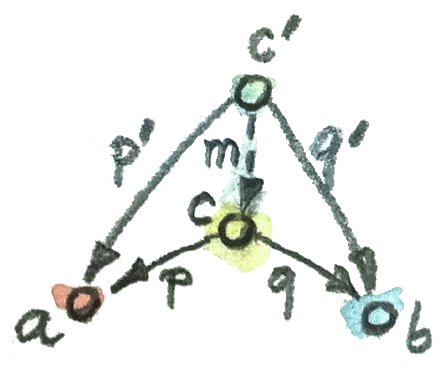

**another way of looking at these equations is that
$m \ \text{factorizes} \ p', q'$**

if these equations are in natural numbers and the dot is mult,

$m$ is a common factor shared by $p', q'$

_P/63 definition of product and factorizer_

> a product of two objects $a, b$ is the object $c$ equipped
with 2 projections such that for any other object $c'$ equipped
with two projections there is a unique morphism $m$, from
$c'$ to $c$ that factorizes those projections

**analogue in Set: the cartesian product of two sets $a, b$**

In [2]:
-- a factorizer in haskell

factorize :: (c -> a) -> (c -> b) -> (c -> (a, b))
factorize p q = (,) <$> p <*> q

f = factorize (+ 1) (> 1)
f 1

g = factorize show (: [])
g 2

(2,False)

("2",[2])

_P/64 coproduct_

the product has a dual, which is called the coproduct

when we reverse the arrows in the product pattern, we 
end up with an object c equipped with two **injections**
$i,j$, which are morphisms from a and b to c

object $c$ is beter than object $c'$ that is equipped
with the injections $i', j'$ if there is morphism
$m$ from $c$ to $c'$ that factorizes the injections

> a coproduct of two objects $a, b$ if the object $c$
equipped with 2 injections such that for any other
object $c'$ equipped with 2 injections there is
a unique morphism $m$ from $c$ to $c'$
that factorizes those injections

**analogue in Set: the disjoint union of two sets $a, b$**

(an element of the disjoint union of $a, b$ is either
an element of $a$ or an element of $b$; if the two
sets overlap, the disjoint union contains 2 copies
of the common part)

other analogue: (in C/C++) tagged union, `boost::variant` (and
now `std::variant`)


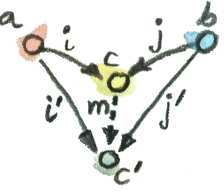

In [3]:
import Data.Void

-- Note, this is still a product (product type)
data Contact = Contact {number :: Int, address :: String}

-- coproduct
data CallSheet = Number Int | Address String

-- the canonical impl of coproduct in haskell is Either

-- coproduct in haskell (Either, sum type)
data Coproduct a b 
    = ELeft a 
    | ERight b

-- this is also a coproduct (with All, the value constructor,
-- being an injection of Void)
data Criteria a 
    = All 
    | Only a
    deriving (Show)
    
i :: Void -> Criteria Void
i _ = All

v :: Void
v = undefined

-- the cheating way of utilizing a Void value (which is 
-- impossible to construct)
i v

All

In [7]:
-- the factorizer of coproduct

-- review how the factorizer works in coproduct:
-- it "sum" the two incoming types a and b into a 
-- "tagged union" type c that has the knowledge
-- of both types;

-- recall the notion: object c is better if there is c -> c'
-- and here c is Either a b, c' is the out type `c`
-- Either is the coproduct as it is the best of all (it
-- has morphisms to every other tagged union type)

import Data.List
import Data.Char

fac :: (a -> c) -> (b -> c) -> Either a b -> c
fac i _ (Left a) = i a
fac _ j (Right b) = j b

foo = fac (length . show) (+ 1)
foo $ Left "iddqd"
foo $ Right 3

7

4

_P/67 asymmetry between product and coproduct_

> product behaves like multiplication with the terminal object
playing the role of one; whereas coproduct behaves more like
sum, with the initial object playing the role of zero

(using the Set modelling again)

> in particular, for finite sets, the size of the product
is the product of the sizes of individual sets and the size
of the coproduct is the sum of the sizes




_P/69 functions are asymmetric_

if a function is defined for every element of its domain set,
**it's a total function**, but it **does not have to cover the
whole codomain**

### (enbedding) surjective / onto

when the size of the domain is much smaller than the
size of the codomain, we often think of such functions as
embedding the domain in the codomain

### injective / one-to-one

functions can map many elements of the domain into one element,
collapse them.

### bijections: truly symmetric, invertible

in the catgory of sets, an isomorphism is the same as a **bijection**